# Data mining the Gaia star archive
### Question: The Gaia database contains billions of stars. Using data mining techniques, identify groups of stars that belong together
Stars that formed from the same cloud, older clusters broke apart - more difficult to classify. Use unsupervised machine learning algorithms to classify star clusters.

Gaia archive: https://gea.esac.esa.int/archive/

Data explained: https://www.cosmos.esa.int/web/gaia/dr2

Gaia data set two was taken on 25 July 2014 (10:30 UTC) and 23 May 2016

In [8]:
import pandas as pd
df = pd.read_csv("GaiaSource_000-020-110.csv")
stats = df.describe()
stats

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,l,b,ecl_lon,ecl_lat
count,1.705790e+05,1.705790e+05,1.705790e+05,170579.0,170579.000000,170579.000000,170579.000000,170579.000000,403.000000,403.000000,...,170579.000000,170579.000000,170579.000000,1.705790e+05,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000
mean,1.635378e+18,6.916184e+18,5.710462e+08,2015.0,314.445730,9.989248,-2.558527,5.915029,2.842900,0.633141,...,-4.029097,27.643187,57.872288,1.374082e+04,26.393011,18.201054,46.092700,-29.074272,316.145533,14.042220
std,0.000000e+00,7.824116e+14,3.303331e+08,0.0,1.494900,10.504467,0.971403,5.701347,3.065102,0.212730,...,28.123823,1.589400,15.012840,3.072943e+05,1058.442394,1.811302,1.441368,1.257351,1.575566,0.914638
min,1.635378e+18,6.914851e+18,1.177300e+04,2015.0,310.788140,0.148633,-4.775293,0.103670,-1.791382,0.224590,...,-59.998318,20.475262,11.000000,1.258887e+01,0.546064,6.296060,42.849223,-31.893663,312.234516,11.766862
25%,1.635378e+18,6.915492e+18,2.840771e+08,2015.0,313.376715,3.436794,-3.331537,1.383367,1.155185,0.460758,...,-24.187854,26.690452,48.000000,2.321637e+02,2.780138,17.234616,44.938345,-30.102178,315.080043,13.390512
50%,1.635378e+18,6.916201e+18,5.700315e+08,2015.0,314.614848,4.602855,-2.642237,4.267861,1.996829,0.638235,...,-3.065681,27.744164,59.000000,5.945685e+02,3.730346,18.589265,46.105692,-29.023634,316.303455,14.025367
75%,1.635378e+18,6.916868e+18,8.582401e+08,2015.0,315.537785,13.754998,-1.843954,9.027622,3.569003,0.817786,...,11.675235,28.743473,69.000000,2.070435e+03,6.488504,19.610284,47.280949,-28.089637,317.342888,14.697067
max,1.635378e+18,6.917529e+18,1.142677e+09,2015.0,317.798057,91.395674,-0.002570,84.366297,23.499923,0.994737,...,59.995136,35.308086,114.000000,4.914554e+07,308189.671077,22.774803,48.915665,-26.394036,319.488987,16.333882


In [9]:
df.head(5) #df[0:5]

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
0,1635378410781933568,6914851441950097280,644618244,2015.0,312.115755,3.956164,-3.740349,1.404508,NaN,NaN,...,28.036676,68,4444.580030,4.916518,16.405193,NOT_AVAILABLE,43.620180,-27.630762,313.504567,13.567278
1,1635378410781933568,6914851476309836160,668015830,2015.0,312.134332,4.045969,-3.739628,1.437343,NaN,NaN,...,28.035465,69,5137.131412,7.556112,16.247968,NOT_AVAILABLE,43.630971,-27.646661,313.523107,13.562885
2,1635378410781933568,6914851476309836800,609250353,2015.0,312.138582,25.938898,-3.737056,11.683244,NaN,NaN,...,23.329552,33,416.763565,3.129720,18.975046,NOT_AVAILABLE,43.635821,-27.649139,313.528028,13.564193
3,1635378410781933568,6914851476309838848,393393107,2015.0,312.131173,24.819271,-3.735257,11.175843,NaN,NaN,...,23.574673,31,353.162079,3.602725,19.154835,NOT_AVAILABLE,43.633581,-27.641793,313.521223,13.567953
4,1635378410781933568,6914851476309839872,241639886,2015.0,312.134676,23.953915,-3.733854,10.811309,NaN,NaN,...,23.329810,33,251.991138,3.906820,19.521307,NOT_AVAILABLE,43.636869,-27.644181,313.525077,13.568342


In [10]:
N = len(df)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 170579 samles.


In [11]:
cols = list(df)
print('Data contains {} columns'.format(len(cols)))

Data contains 57 columns


In [12]:
N = df.shape[0]
P = df.shape[1]

print('Data has {} rows, {} columns'.format(N, P))

Data has 170579 rows, 57 columns


In [13]:
df.dtypes #no spectra data

solution_id                        int64
source_id                          int64
random_index                       int64
ref_epoch                        float64
ra                               float64
ra_error                         float64
dec                              float64
dec_error                        float64
parallax                         float64
parallax_error                   float64
pmra                             float64
pmra_error                       float64
pmdec                            float64
pmdec_error                      float64
ra_dec_corr                      float64
ra_parallax_corr                 float64
ra_pmra_corr                     float64
ra_pmdec_corr                    float64
dec_parallax_corr                float64
dec_pmra_corr                    float64
dec_pmdec_corr                   float64
parallax_pmra_corr               float64
parallax_pmdec_corr              float64
pmra_pmdec_corr                  float64
astrometric_n_ob

# Below: 1 degree box
### RA: 10-11degree, DEC: 0-1
https://gea.esac.esa.int/archive/

Stellarium: 16-17 stars

Gaia: 2987 stars

SQL: SELECT * 
from gaiadr2.gaia_source 
where 
RA between 10 and 11 AND
DEC between 0 and 1


In [14]:
one_degree_box = pd.read_csv("1degree.csv")
one_degree_box.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
count,2.987000e+03,2.987000e+03,2.987000e+03,2987.0,2987.000000,2987.000000,2987.000000,2987.000000,2362.000000,2362.000000,...,401.000000,401.000000,401.000000,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,1.635721e+18,2.545348e+18,8.348150e+08,2015.5,10.493477,2.463617,0.497418,1.399731,1.118871,0.515015,...,0.145748,0.080983,0.232484,200111.0,1.146199,1.037363,1.228500,2.469787,2.134659,2.804914
std,0.000000e+00,2.906554e+15,4.872723e+08,0.0,0.294380,7.761182,0.289191,4.448988,1.631237,0.463866,...,0.164295,0.124251,0.199014,0.0,1.541179,1.378242,1.635531,13.575517,10.984913,16.270136
min,1.635721e+18,2.543035e+18,1.729800e+04,2015.5,10.000043,0.020369,0.000095,0.014438,-5.938072,0.022573,...,0.003000,0.000000,0.017100,200111.0,0.500944,0.348610,0.508067,0.030641,0.029643,0.031640
25%,1.635721e+18,2.543104e+18,4.181524e+08,2015.5,10.236596,0.167316,0.241739,0.111729,0.274800,0.138554,...,0.037000,0.006900,0.093100,200111.0,0.657643,0.589448,0.704749,0.188104,0.171484,0.201126
50%,1.635721e+18,2.543315e+18,8.389194e+08,2015.5,10.485396,0.496462,0.488284,0.357365,0.859963,0.382675,...,0.093000,0.032600,0.168300,200111.0,0.833459,0.757096,0.890149,0.466593,0.407986,0.532451
75%,1.635721e+18,2.549134e+18,1.255057e+09,2015.5,10.754713,1.217741,0.747516,0.866748,1.713874,0.760717,...,0.192300,0.107000,0.304600,200111.0,1.088864,1.017593,1.195962,1.154610,1.032632,1.304638
max,1.635721e+18,2.549394e+18,1.691948e+09,2015.5,10.999717,88.285228,0.999616,62.026589,28.199629,3.248399,...,1.065500,0.821900,1.213100,200111.0,19.346436,17.540230,20.250835,197.145390,145.256930,249.033840


In [15]:
N = len(one_degree_box)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 2987 samles.


In [16]:
data = one_degree_box[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'phot_g_mean_flux', 'phot_g_mean_mag', 'b', 'l']]

<function matplotlib.pyplot.show(*args, **kw)>

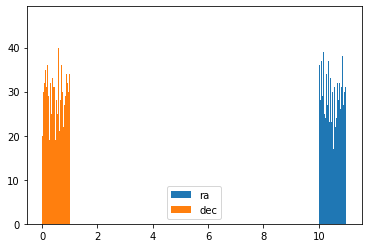

In [17]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(data['ra'], label='ra', bins=100)
plt.hist(data['dec'], label='dec', bins=100)
plt.legend()
plt.show

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

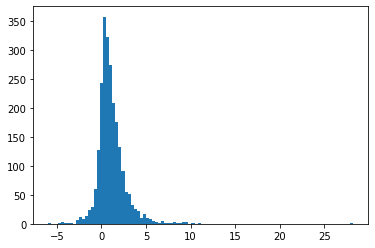

In [18]:
plt.hist(data['parallax'], bins=100)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

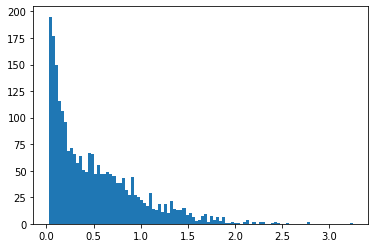

In [19]:
plt.hist(data['parallax_error'], bins=100)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

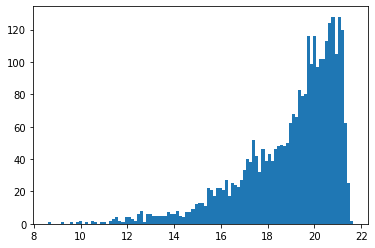

In [20]:
plt.hist(data['phot_g_mean_mag'], bins=100)
plt.show

## Find distance
distance = 1/parallax

Transverse velocity in right ascension: vTra(km/s) = pmra(arcsec/yr) * d * 4.740

Transverse velocity in declination: vTdec(km/s) = pmdec(arcsec/yr) * d * 4.740

#### parallax: 
- arcseconds or milliarcseconds
- apparent shift of position of any nearby star against the background of distant objects
- "Parallax uncertainties are in the range of up to 0.04 milliarcsecond for sources at G < 15, around 0.1 mas for sources with G=17 and at the faint end"

#### proper motion: 
- arcseconds per year or milliarcseconds per year
- angular velocity across the sky exhibited by a celestial body
- vR, the star's radial velocity
- pmra, the component of proper motion in right ascension, and
- pmdec, the component of proper motion in declination.

In [21]:
data.head(20)

,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_flux,phot_g_mean_mag,b,l
0,10.910672,0.153058,NaN,NaN,NaN,NaN,144.412272,20.289356,-62.654417,118.686394
1,10.859938,0.153501,0.345412,0.723004,4.188321,-8.079128,188.297027,20.001257,-62.650588,118.576266
2,10.901538,0.155252,-0.208778,0.893954,1.454527,-1.324278,120.151203,20.489046,-62.651624,118.666870
3,10.683739,0.019205,0.382521,0.317710,-1.734745,-2.584722,521.258231,18.895733,-62.772088,118.172197
4,10.636041,0.040811,NaN,NaN,NaN,NaN,90.379070,20.798197,-62.746982,118.071804
5,10.713029,0.082916,NaN,NaN,NaN,NaN,87.414204,20.834412,-62.710694,118.246169
6,10.610089,0.036868,4.141359,0.180118,58.473849,-26.433618,1171.855152,18.016180,-62.748946,118.014638
7,10.852308,0.252707,NaN,NaN,NaN,NaN,469.598765,19.009048,-62.551093,118.574299
8,10.822123,0.091510,NaN,NaN,NaN,NaN,105.246325,20.632849,-62.709852,118.484839
9,10.833893,0.226309,-0.008680,0.535908,-1.973189,-0.573069,324.343102,19.410854,-62.576179,118.530532


Questions:

What does it mean when parallax is negative? - Obteuse angle

How can parallax be greater than 1? If the closest star is >1pc away (so if parallax is > 1, the closest star would be <1pc away) - milliarseconds

In [36]:
data.loc[:, 'parallax_arcsec'] = data['parallax'].apply(lambda x: x*.001)
data.head(10)

,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_flux,phot_g_mean_mag,b,l,parallax_arcsec,distance_pc
0,10.910672,0.153058,NaN,NaN,NaN,NaN,144.412272,20.289356,-62.654417,118.686394,NaN,NaN
1,10.859938,0.153501,0.345412,0.723004,4.188321,-8.079128,188.297027,20.001257,-62.650588,118.576266,0.000345,2895.093026
2,10.901538,0.155252,-0.208778,0.893954,1.454527,-1.324278,120.151203,20.489046,-62.651624,118.666870,-0.000209,0.000000
3,10.683739,0.019205,0.382521,0.317710,-1.734745,-2.584722,521.258231,18.895733,-62.772088,118.172197,0.000383,2614.233439
4,10.636041,0.040811,NaN,NaN,NaN,NaN,90.379070,20.798197,-62.746982,118.071804,NaN,NaN
5,10.713029,0.082916,NaN,NaN,NaN,NaN,87.414204,20.834412,-62.710694,118.246169,NaN,NaN
6,10.610089,0.036868,4.141359,0.180118,58.473849,-26.433618,1171.855152,18.016180,-62.748946,118.014638,0.004141,241.466658
7,10.852308,0.252707,NaN,NaN,NaN,NaN,469.598765,19.009048,-62.551093,118.574299,NaN,NaN
8,10.822123,0.091510,NaN,NaN,NaN,NaN,105.246325,20.632849,-62.709852,118.484839,NaN,NaN
9,10.833893,0.226309,-0.008680,0.535908,-1.973189,-0.573069,324.343102,19.410854,-62.576179,118.530532,-0.000009,0.000000


In [37]:
def distance(x):
    if x < 0:
        return 0
    else:
        return 1/x

data.loc[:, 'distance_pc'] = data['parallax_arcsec'].apply(distance)
data.tail(10)

,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_flux,phot_g_mean_mag,b,l,parallax_arcsec,distance_pc
2978,10.722214,0.929531,2.100733,0.230291,25.555238,-2.402837,1044.980670,18.140594,-61.866905,118.396128,0.002101,476.024422
2979,10.772633,0.953101,1.911479,0.169634,-10.862535,-11.900259,1539.731070,17.719753,-61.846897,118.506223,0.001911,523.155165
2980,10.777365,0.936106,0.229167,0.076172,4.878078,-3.812024,5857.927980,16.269005,-61.864178,118.513757,0.000229,4363.638552
2981,10.731220,0.939661,0.471763,0.653492,-1.054411,-0.917793,236.715737,19.752798,-61.857433,118.416684,0.000472,2119.709840
2982,10.295914,0.971918,NaN,NaN,NaN,NaN,59.694363,21.248533,-61.791692,117.502902,NaN,NaN
2983,10.399480,0.846831,-2.305684,1.429532,-5.911033,-14.907645,95.134940,20.742516,-61.924914,117.699771,-0.002306,0.000000
2984,10.499344,0.814703,1.047450,0.080993,21.187167,-4.054020,4329.646951,16.597235,-61.964886,117.905973,0.001047,954.699494
2985,10.357006,0.837253,NaN,NaN,NaN,NaN,66.693747,21.128153,-61.930982,117.608161,NaN,NaN
2986,10.645389,0.933783,0.615755,0.431323,4.930083,-3.656066,465.640401,19.018240,-61.857161,118.234310,0.000616,1624.021847
parallax_arcsec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(*args, **kw)>

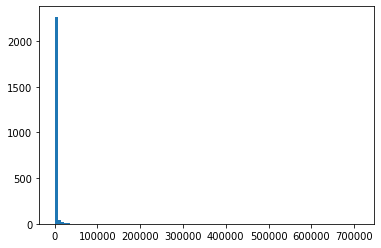

In [24]:
plt.hist(data['distance_pc'], label='distance_pc', bins=100)
plt.show

## Below: graph of brightest 17 stars in gaia for same boxed area

In [25]:
sort_by_mag = data.sort_values('phot_g_mean_mag')
sort_by_mag_result = sort_by_mag.head(15)
sort_by_mag_result

,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_flux,phot_g_mean_mag,b,l,parallax_arcsec,distance_pc
2777,10.678788,0.736193,4.291614,0.058850,-0.613010,-23.745137,6.687670e+06,8.625178,-62.056654,118.274652,0.004292,233.012592
248,10.345400,0.709289,1.840553,0.048264,68.330011,18.516878,3.836632e+06,9.228490,-62.057543,117.560926,0.001841,543.315074
1174,10.429049,0.112116,3.719426,0.055508,-15.412542,-40.548652,2.841170e+06,9.554623,-62.659590,117.634098,0.003719,268.858672
578,10.178152,0.766256,2.376286,0.189539,27.882183,1.976316,2.067866e+06,9.899560,-61.986408,117.216210,0.002376,420.824752
2680,10.719117,0.852402,5.757340,0.050462,29.866874,-2.483321,1.881936e+06,10.001854,-61.943624,118.378017,0.005757,173.691324
2471,10.673691,0.893143,3.987886,0.060811,24.005113,10.790422,1.867389e+06,10.010279,-61.899745,118.287942,0.003988,250.759401
1623,10.069604,0.954020,2.160643,0.044696,-12.644336,-11.176725,1.423794e+06,10.304748,-61.789625,117.022727,0.002161,462.825164
1568,10.265591,0.347096,3.446309,0.153981,-37.606195,-27.309037,1.211065e+06,10.480447,-62.411626,117.324041,0.003446,290.165543
1088,10.442761,0.165463,5.051967,0.104538,89.635693,-65.566802,1.128951e+06,10.556678,-62.607545,117.673330,0.005052,197.942693
2964,10.653081,0.982443,0.639108,0.046394,2.991214,-0.752456,1.038375e+06,10.647480,-61.809189,118.258056,0.000639,1564.680400


<function matplotlib.pyplot.show(*args, **kw)>

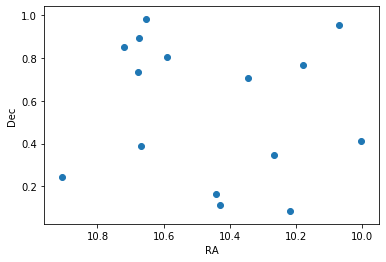

In [26]:
#from Earth's point of view
plt.scatter(sort_by_mag_result['ra'], sort_by_mag_result['dec'])
plt.gca().invert_xaxis()
plt.xlabel("RA")
plt.ylabel("Dec")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

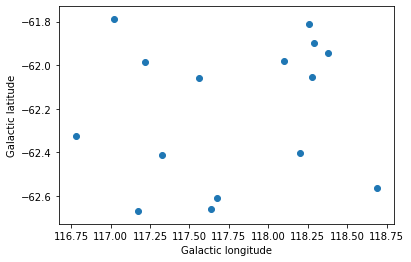

In [27]:
#from outside the galaxy point of view
plt.scatter(sort_by_mag_result['l'], sort_by_mag_result['b'])
#plt.gca().invert_xaxis()
plt.xlabel("Galactic longitude")
plt.ylabel("Galactic latitude")
plt.show

### Below: alien view graph w/ Earth in the center
- Parallax: R, turns into distance, error makes it negative (ignore negatives for now)
- Galactic longitude: l, Ө (around)
- Galactic latitude: b, Φ (above/below)


- x = RcosΦcosӨ = Rcos(b)cos(l)
- y = RcosΦsinӨ = Rcos(b)sin(l)
- z = RsinΦ = Rsin(b)

Start with 1pc away, then 5pc, then 10pc.

In [28]:
#Functions for x, y, and z
import math
def x(R, b, l):
    #if R is None:
    #    return 0
    #else:
        return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    #if R is None:
    #    return 0
    #else:
        return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

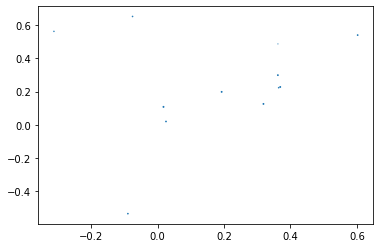

,ra,dec,parallax,parallax_error,b,l,parallax_arcsec,R,x,y,z
0,272.279050,-27.459411,1020.591099,1.853096,-3.741689,3.872279,1.020591,0.979824,0.602201,0.539664,0.553328
1,266.271856,-18.634859,1031.014967,2.479063,5.454299,8.752967,1.031015,0.969918,-0.512956,0.407905,-0.715004
2,272.338606,-34.219857,1043.653463,1.859449,-7.010861,357.927615,1.043653,0.958172,0.699176,-0.151912,-0.637315
3,265.855960,-21.840104,1051.226352,1.650881,4.125747,5.799665,1.051226,0.951270,-0.466226,0.244812,-0.792222
4,268.890121,-34.369873,1089.414641,2.782828,-4.593278,356.405239,1.089415,0.917924,0.017973,0.107586,0.911420
5,272.636302,-27.835553,1131.012190,1.233718,-4.199782,3.693581,1.131012,0.884164,0.369236,0.227392,0.770521
6,244.475904,-52.058308,1143.670454,4.660277,-1.136003,331.752301,1.143670,0.874378,0.113854,-0.350268,-0.793023
7,278.234339,-13.443230,1165.406339,2.402909,-2.075070,18.878487,1.165406,0.858070,-0.414422,-0.011993,-0.751262
8,270.854065,-32.395981,1191.578490,1.411859,-5.048062,358.939694,1.191578,0.839223,0.192971,0.197949,0.792385
9,272.629124,-28.033239,1200.180374,1.701540,-4.288744,3.516443,1.200180,0.833208,0.318736,0.125408,0.759550


In [65]:
#1pc = d = 1/p, 1pc = 1/p = 1arcsec so p >= 1000 miliarcseconds
data_frame = pd.read_csv("1pc.csv")
one = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
one.loc[:, 'parallax_arcsec'] = one['parallax'].apply(lambda x: x*.001)
one.loc[:, 'R'] = one['parallax_arcsec'].apply(distance)
one.loc[:, 'x'] = one.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
one.loc[:, 'y'] = one.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
one.loc[:, 'z'] = one.apply(lambda r: z(r['R'], r['b']), axis=1)
plt.scatter(one['x'], one['y'], one['z'])
plt.show()
one.head(10)

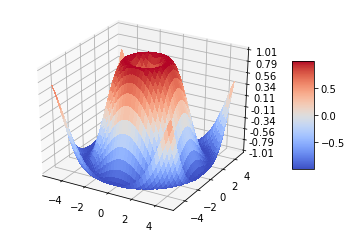

In [69]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax= fig.add_subplot(111, projection ='3d')
#ax = plt.axes(projection='3d')

#test - has nothing to do with the Gaia database
#https://matplotlib.org/examples/mplot3d/surface3d_demo.html

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

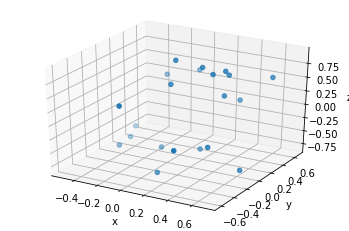

In [85]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection ='3d')
ax1.scatter(one['x'], one['y'], one['z'])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

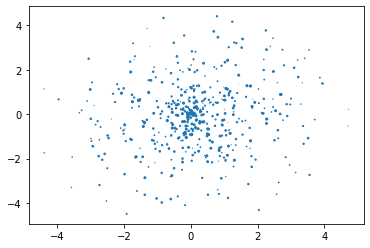

In [60]:
#5pc = 1/p -> 1/5 arcseconds so p >= 200 miliarcseconds
data_frame = pd.read_csv("5pc.csv")
five = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
five.loc[:, 'parallax_arcsec'] = five['parallax'].apply(lambda x: x*.001)
five.loc[:, 'R'] = five['parallax_arcsec'].apply(distance)
five.loc[:, 'x'] = five.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'y'] = five.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'z'] = five.apply(lambda r: z(r['R'], r['b']), axis=1)
plt.scatter(five['x'], five['y'], five['z'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

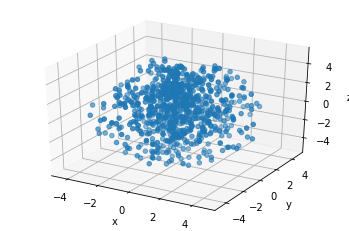

In [86]:
fig = plt.figure()
ax5 = fig.add_subplot(111, projection ='3d')
ax5.scatter(five['x'], five['y'], five['z'])
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax5.set_zlabel('z')
plt.show

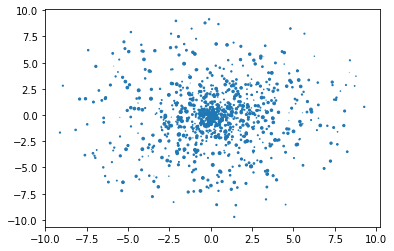

In [45]:
#10pc = 1/p -> 1/10 arcseconds so p >= 100 miliarcseconds
data_frame = pd.read_csv("10pc.csv")
ten = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
ten.loc[:, 'parallax_arcsec'] = ten['parallax'].apply(lambda x: x*.001)
ten.loc[:, 'R'] = ten['parallax_arcsec'].apply(distance)
ten.loc[:, 'x'] = ten.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'y'] = ten.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'z'] = ten.apply(lambda r: z(r['R'], r['b']), axis=1)
plt.scatter(ten['x'], ten['y'], ten['z'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

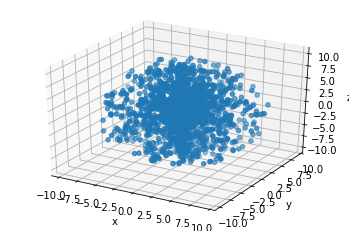

In [87]:
fig = plt.figure()
ax10 = fig.add_subplot(111, projection ='3d')
ax10.scatter(ten['x'], ten['y'], ten['z'])
ax10.set_xlabel('x')
ax10.set_ylabel('y')
ax10.set_zlabel('z')
plt.show

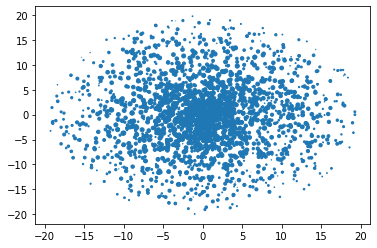

In [46]:
#20pc
data_frame = pd.read_csv("20pc.csv")
twenty = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
twenty.loc[:, 'parallax_arcsec'] = twenty['parallax'].apply(lambda x: x*.001)
twenty.loc[:, 'R'] = twenty['parallax_arcsec'].apply(distance)
twenty.loc[:, 'x'] = twenty.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'y'] = twenty.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'z'] = twenty.apply(lambda r: z(r['R'], r['b']), axis=1)
plt.scatter(twenty['x'], twenty['y'], twenty['z'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

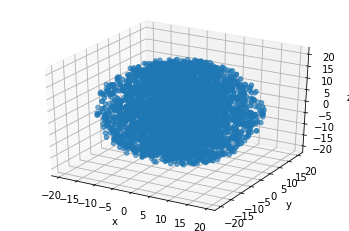

In [88]:
fig = plt.figure()
ax20 = fig.add_subplot(111, projection ='3d')
ax20.scatter(twenty['x'], twenty['y'], twenty['z'])
ax20.set_xlabel('x')
ax20.set_ylabel('y')
ax20.set_zlabel('z')
plt.show

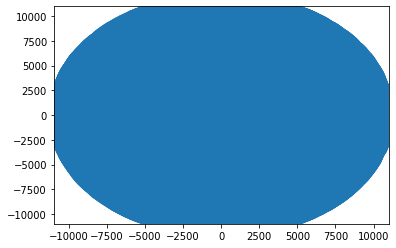

In [48]:
#Between 10,000 and 10,001.01 pc, parallax bw 0.1 and 0.09999
data_frame = pd.read_csv("between1pc.csv")
between1 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
between1.loc[:, 'parallax_arcsec'] = between1['parallax'].apply(lambda x: x*.001)
between1.loc[:, 'R'] = between1['parallax_arcsec'].apply(distance)
between1.loc[:, 'x'] = between1.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'y'] = between1.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'z'] = between1.apply(lambda r: z(r['R'], r['b']), axis=1)
between1.describe()
plt.scatter(between1['x'], between1['y'], between1['z'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

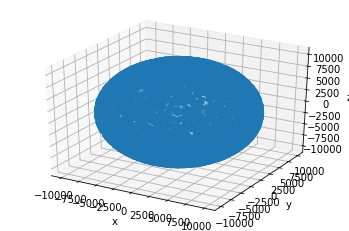

In [89]:
fig = plt.figure()
axbw = fig.add_subplot(111, projection ='3d')
axbw.scatter(between1['x'], between1['y'], between1['z'])
axbw.set_xlabel('x')
axbw.set_ylabel('y')
axbw.set_zlabel('z')
plt.show

In [84]:
#Next: Between 10,000 and 10,010.01 pc? parallax bw 0.1 and 0.0999